# Лабораторна робота №4

### Обробка зображень та робота з наборами файлів цифрових зображень

**Виконав\
студент групи КН-221а\
Медвідь Роман Ігорович\
Перевірив\
асистент кафедри\
Звєрцев Герман Олександрович**

### Мета: Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

Завдання 1. Робота з набором файлів.

1) Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
2) Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:

- ім’я файлу;
- кольорову модель;
- формат;
- кількість каналів у зображенні;
- розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;
- ширину картинки;
- висоту картинки;
- повний шлях до файлу;
- зменшене зображення.

In [13]:
%pip install pandas

,name,color model,format,channels,size,width,height,full path,image
0,33728-6-puppy-transparent-image-thumb.png,RGBA,None,4,16.38,128,128,images/33728-6-puppy-transparent-image-thumb.png,
1,467-4672667_png-file-size-hard-brush-stroke-png-transparent.png,RGB,None,3,16.38,128,128,images/467-4672667_png-file-size-hard-brush-stroke-png-transparent.png,
2,6440.png_860.png,RGB,None,3,16.38,128,128,images/6440.png_860.png,
3,PNG_transparency_demonstration_1.png,RGBA,None,4,12.29,128,96,images/PNG_transparency_demonstration_1.png,
4,apple-98-964x1024.png,RGBA,None,4,15.36,120,128,images/apple-98-964x1024.png,
5,media_16ad2258cac6171d66942b13b8cd4839f0b6be6f3.png,RGBA,None,4,12.54,128,98,images/media_16ad2258cac6171d66942b13b8cd4839f0b6be6f3.png,
6,pngimg.com - mario_PNG125.png,RGBA,None,4,14.98,128,117,images/pngimg.com - mario_PNG125.png,

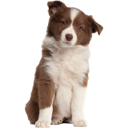
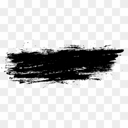
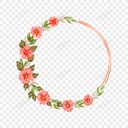
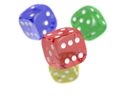
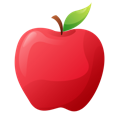
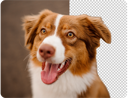
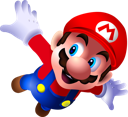

In [1]:
import os
import io
import glob
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display, HTML
from base64 import b64encode

def resize_image(image, max_dim=128):
    width, height = image.size;
    aspect_ratio = width / height;

    if aspect_ratio > 1:
        width = max_dim;
        height = int(width / aspect_ratio);
    else:
        height = max_dim;
        width = int(height * aspect_ratio);

    return image.resize((width, height));

def to_dataframe(path):
    files = glob.glob(f"{path}/*");
    df = pd.DataFrame(columns=["name", "color model", "format", "channels", "size", "width", "height", "full path", "image"]);

    for file_path in files:
        try:
            image = Image.open(file_path);
            image = resize_image(image);
            size = round(image.size[0] * image.size[1] / 1000, 2);

            image_html = f'<img src="data:image/png;base64,{image_to_base64(image)}" width="{image.width}" height="{image.height}" />';

            df.loc[len(df)] = [
                os.path.basename(file_path),
                image.mode,
                image.format,
                len(image.getbands()),
                size,
                image.width,
                image.height,
                file_path,
                image_html
            ];
        except (IOError, OSError):
            pass

    return df;

def image_to_base64(image):
    buffered = io.BytesIO();
    image.save(buffered, format="PNG");
    return b64encode(buffered.getvalue()).decode();

path = "images";
df = to_dataframe(path);
display(HTML(df.to_html(escape=False)));

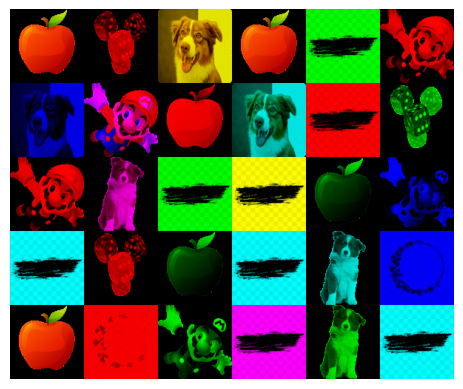

In [3]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Функція для застосування фільтра до зображення
def apply_filter(img, filter_function):
    img_array = np.array(img);
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2];
    new_r, new_g, new_b = filter_function(r, g, b);
    new_img_array = np.stack([new_r, new_g, new_b], axis=-1);
    return Image.fromarray(new_img_array.astype('uint8'));

# Функції для різних фільтрів
def red_filter(r, g, b):
    return r, np.zeros_like(g), np.zeros_like(b);

def blue_filter(r, g, b):
    return np.zeros_like(r), np.zeros_like(g), b;

def green_filter(r, g, b):
    return np.zeros_like(r), g, np.zeros_like(b);

def yellow_filter(r, g, b):
    return r, g, np.zeros_like(b);

def purple_filter(r, g, b):
    return r, np.zeros_like(g), b;

def skyblue_filter(r, g, b):
    return np.zeros_like(r), g, b;

# Функція для створення постера
def create_poster(folder_path, output_name, num_rows, num_cols):
    image_files = os.listdir(folder_path);
    poster_images = [];

    for _ in range(num_rows * num_cols):
        random_image_name = random.choice(image_files);
        random_image_path = os.path.join(folder_path, random_image_name);
        img = Image.open(random_image_path);
        img = img.resize((100, 100));
        
        if img.mode != 'RGB':
            img = img.convert('RGB');
        
        filter_choice = random.choice([
            red_filter, green_filter, blue_filter,
            yellow_filter, purple_filter, skyblue_filter
        ]);
        
        new_img = apply_filter(img, filter_choice);
        poster_images.append(new_img);

    poster_width = num_cols * 100;
    poster_height = num_rows * 100;
    poster = Image.new('RGB', (poster_width, poster_height));

    for i in range(num_rows):
        for j in range(num_cols):
            img = poster_images[i * num_cols + j];
            poster.paste(img, (j * 100, i * 100));
            
    poster.save(output_name);
    return poster;

folder_path = "images";
output_name = "poster2.png";
new_poster = create_poster(folder_path, output_name, 5, 6);

plt.imshow(new_poster);
plt.axis("off");
plt.show();